# Project: Scoping faulty pumps in Tanzania for repairs.

## I. Business Understanding

The World Bank through its ___ program would like to repair wells in Tanzania. Little data is available on a few functional and non-functional wells but most are not classified. Mazingira Bora is a cosulting company tasked with the scoping of the repair work to be done on the well pumps.

### Problem Statement

### Success Metrics

### Methodology

## II. Data Understanding

The datasets were downloaded from Driven Data's "Pump it Up: Data Mining the Water Table" competition. This data is provided by the government of Tanzania throught the ___.

These are the Training set values, Training set labels and the Testing set values. We'll first strain our data using a merged data frame of the Training set values and Training set labels, then test it using the Testing set values dataset. 
The Training set values data frame has 59,400 rows and 40 columns while the Training set labels dataframe has 59,400 rows and 2 columns. The two datasets have a similar "id" column.

### Column names and their description for Training set values dataset

* `id` - A Unique identifier for each water point
* `amount_tsh` - Total static head (amount water available to waterpoint)
* `date_recorded` - The date the row was entered
* `funder` - Who funded the well
* `gps_height` - Altitude of the well
* `installer` - Organization that installed the well
* `longitude` - GPS coordinate
* `latitude` - GPS coordinate
* `wpt_name` - Name of the waterpoint if there is one
* `num_private` -
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location
* `population` - Population around the well
* `public_meeting` - True/False
* `recorded_by` - Group entering this row of data
* `scheme_management` - Who operates the waterpoint
* `scheme_name`- Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `construction_year` - Year the waterpoint was constructed
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint

### Column names and their description for Training set labels dataset
* `id` - A Unique identifier for each water point
* `status_group` - Whether pump is functional or not

### Data source

### Limitations

### Importing core libraries

In [2]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import scatter_matrix


# Statistical modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.weightstats import ztest

# Machine Learning preprocessing and modeling
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Statistical functions
import scipy.stats as sp
from scipy.stats import skew, kurtosis, chi2_contingency

In [3]:
df1 = pd.read_csv("./Training Data/Training_set_values.csv")
print(df1.shape)
df1.iloc[:, :16].head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe


In [4]:

df1.iloc[:, 15:30].head()

,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment
0,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually
1,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay
2,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket
3,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay
4,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay


In [5]:

df1.iloc[:, 29:].head()

,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
# Reading the training set labels dataset into a dataframe
df2 = pd.read_csv("./Training Data/Training_set_labels.csv")

# The rows and columns in the dataset.
print(df2.shape)

#The first five rows in the dataset.
df2.head()

(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
# Combining the training data into one data frame, keeping the data from both data frames, using the id column.
df = pd.merge(df1, df2, on='id', how='outer')
# Checking the number of rows and columns in the merged df
print(df.shape)
# Viewing the first five rows of the merged df
df.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [8]:
# Viewing the last five rows of the merged df
df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [9]:
# Creating a copy of the dataframe, just incase it is needed later

df_copy = df.copy()

In [10]:
# Writing the copy data frame into a csv file

#df_copy

In [11]:
# Description of the data
df.iloc[:, :].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


The features described in the above data set are:

Count = Number of non-empty rows in a feature\
Mean = Mean value of a feature\
Std = Standard Deviation Value of a feature\
Min = Minimum value of a feature\
25%, 50%, and 75% = Percentile/quartile of each feature\
Max = Maximum value of a feature

In [12]:
# Viewing information on the merged dataframe including columns, missing values and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [13]:
df['installer'].value_counts(dropna=False)

installer
DWE                17402
NaN                 3655
Government          1825
RWE                 1206
Commu               1060
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: count, Length: 2146, dtype: int64

In [14]:
df['scheme_management'].value_counts()

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

## II Data Cleaning

### II.a Data wrangling and changing feature data types 

The data types seem to correspond to each column of the dataset for now

### II.b Null values

In [15]:
# Checking for null values
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

As shown above, seven features of the dataset have null values. Let's explore them further.

In [16]:
# A data frame of the features with null values
null_value_features = df.columns[df.isnull().any()]
null_df = df[null_value_features]
null_df.head()

,funder,installer,wpt_name,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,none,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Zahanati,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Kwa Mahundi,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Zahanati Ya Nanyumbu,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Shuleni,Kyanyamisa,True,NaN,NaN,True


In [17]:
# The sum of null values in each column.
null_sum = null_df.isnull().sum()
# The total number of entries on the columns
col_length = null_df.shape[0]
# Null values as a percentage of the entries
null_percent = (null_sum/col_length) * 100

print(null_percent.round(2))

funder                6.12
installer             6.15
wpt_name              0.00
subvillage            0.62
public_meeting        5.61
scheme_management     6.53
scheme_name          48.50
permit                5.14
dtype: float64


The `scheme_name` feature represents a unique name given to an operator of a waterpoint. This feature can be dropped since:
1. Approximately 48% of it contains null values
2. It has no functional value for the analysis.

The `wpt_name` feature

In [18]:
# Dropping columns that will not be used in our Analysis.
df.drop(columns=['scheme_name', 'wpt_name'], inplace=True)

In [19]:
df.shape

(59400, 39)

In [20]:
##

In [21]:
##

### II.c Duplicates

In [22]:
# Checking for duplicated entries.
df.duplicated().sum()

0

### III.d Outliers

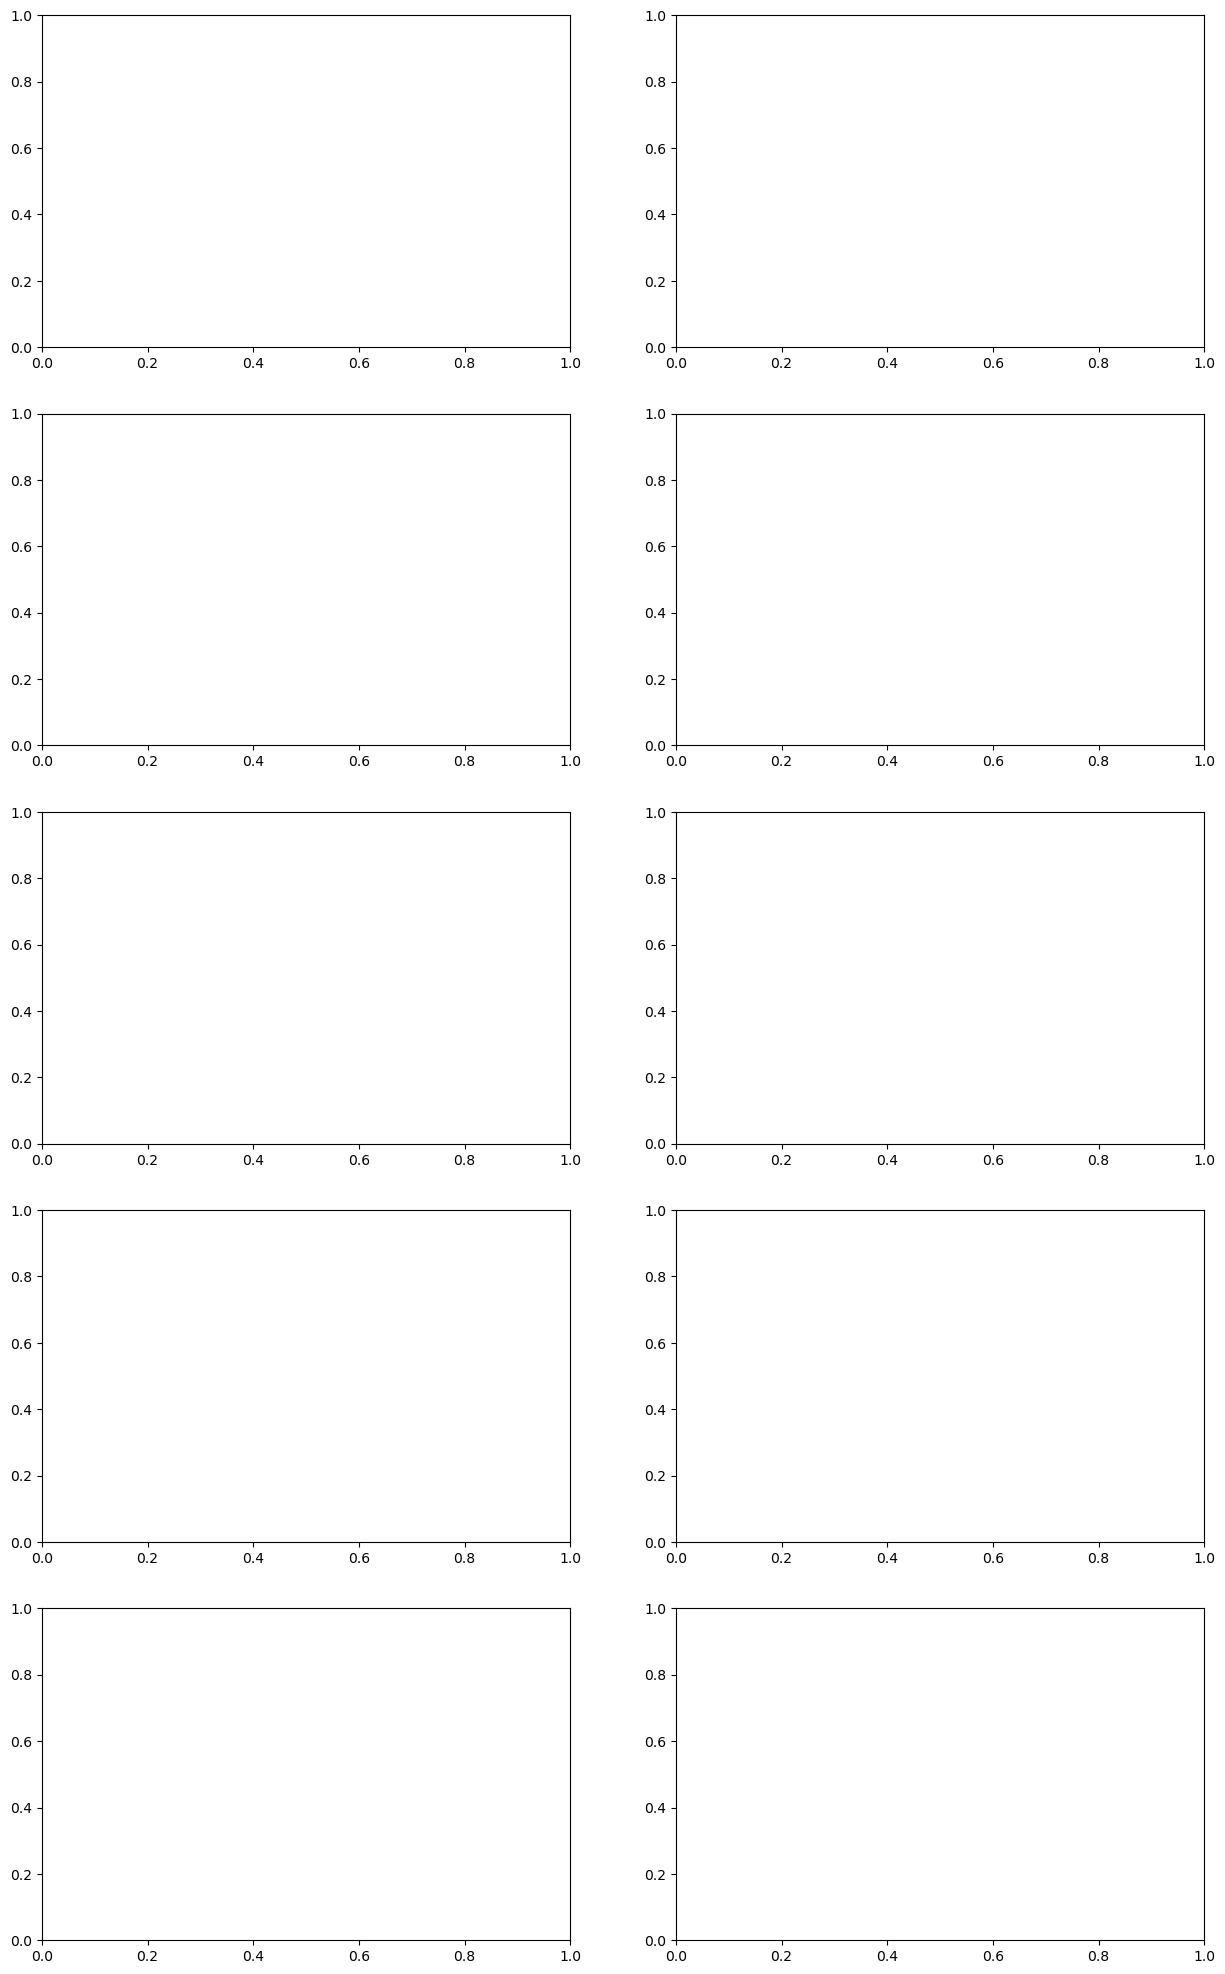

In [23]:
# Outliers
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define the number of columns for the layout
num_columns = 2

# Calculate the number of rows needed
num_rows = len(numerical_columns) // num_columns + (len(numerical_columns) % num_columns > 0)

# Create a figure and set the size
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a colormap

There are no duplicate entries in the dataframe. 

#### Explanation on why the columns below were dropped.

The num-private had no description therefore it is unnecessary to use data we have no idea about.

In [25]:
df.drop(columns=['id','date_recorded','num_private',], inplace=True)

## Exploratory Data Analysis

### Univariate and bivariate Analysis

Checking the distribution of functional, non-functional and functional but needs repair pumps in the dataset.

### amount_tsh

This is Total static head (amount water available to waterpoint). 

In [26]:
# Looking at the unique values in the amount_tsh feature.
df['amount_tsh'].value_counts()

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64

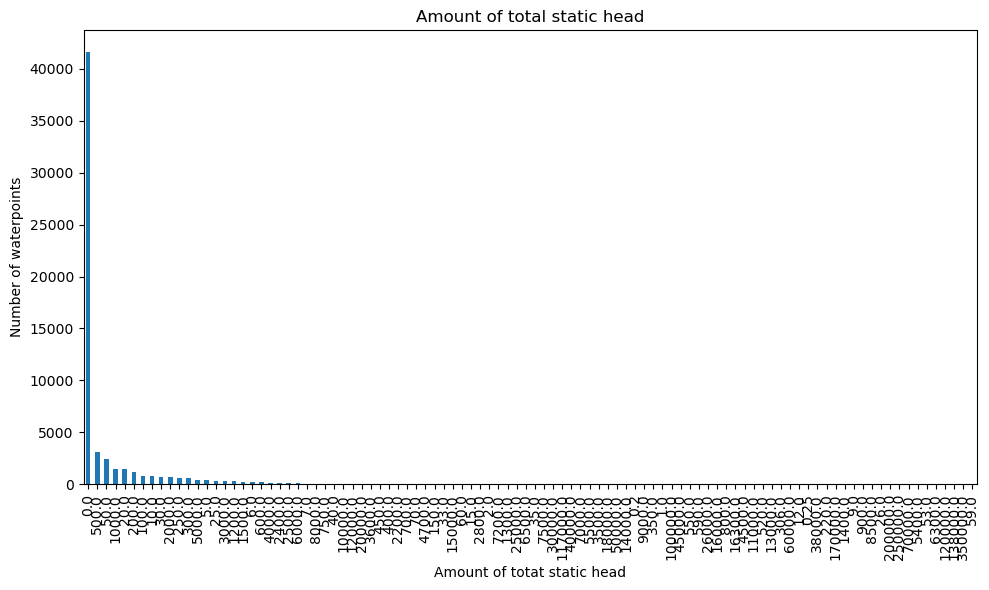

In [28]:
# creating a variable to store the value counts 
category_counts = df['amount_tsh'].value_counts()

# Creating a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Amount of total static head')
plt.xlabel('Amount of totat static head')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

As seen above, 41,639 values are 0.0, means at these waterpoints the  water available is at the surface. Let us represent this as a percentage of the total values in this feature to understand it better.

In [26]:
# We can divide 41,639 by the total count to get percentage
zero_perc = ((41639/df['amount_tsh'].count()) * 100).round(2)
zero_perc

70.1

This feature has approximately 70% of values equal to zero. This is the amount of water at the surface hence a pump may not be needed at such a waterpoint. It can be dropped.

### funder

This feature had null values, we'll handle them in this section. First, it's prudent to understand the unique values of this feature.

In [29]:
df['funder'].value_counts()

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Muwasa                       1
Msigw                        1
Rc Mofu                      1
Overland High School         1
Samlo                        1
Name: count, Length: 1896, dtype: int64

In [36]:
perc_null = (df['funder'].isnull().sum()/df['funder'].count()) * 100
print(perc_null.round(2))

6.52


This feature represents different categories of project funders. It is prudent to replace the null values with unknown. This is because, crediting a project to a funder who did not fund it will be unprofessional. It is better to acknowledge that the data is missing.

In [37]:
# Filling the null values with unknown.
df['funder'].fillna(value='Unknown', inplace=True)

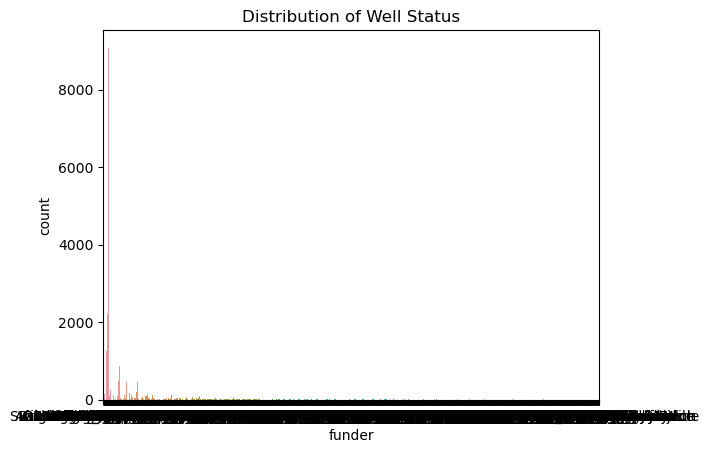

In [28]:
sns.countplot(x='funder', data=df)
plt.title('Distribution of Well Status')
plt.show()

### Installer

In [29]:
df['installer'].value_counts()

installer
DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: count, Length: 2145, dtype: int64

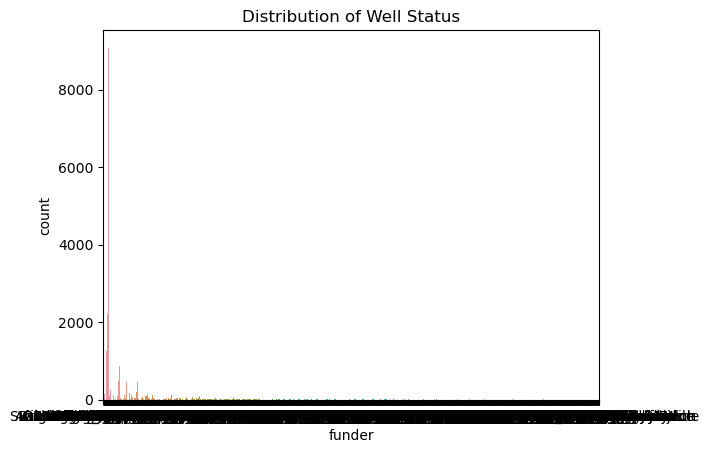

In [30]:
sns.countplot(x='funder', data=df)
plt.title('Distribution of Well Status')
plt.show()

### gps_height

This feature shows the altitude of each well. 

In [31]:
df['gps_height'].value_counts()

gps_height
 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: count, Length: 2428, dtype: int64

As seen above, 20438 waterpoints are at an altitude of 0.

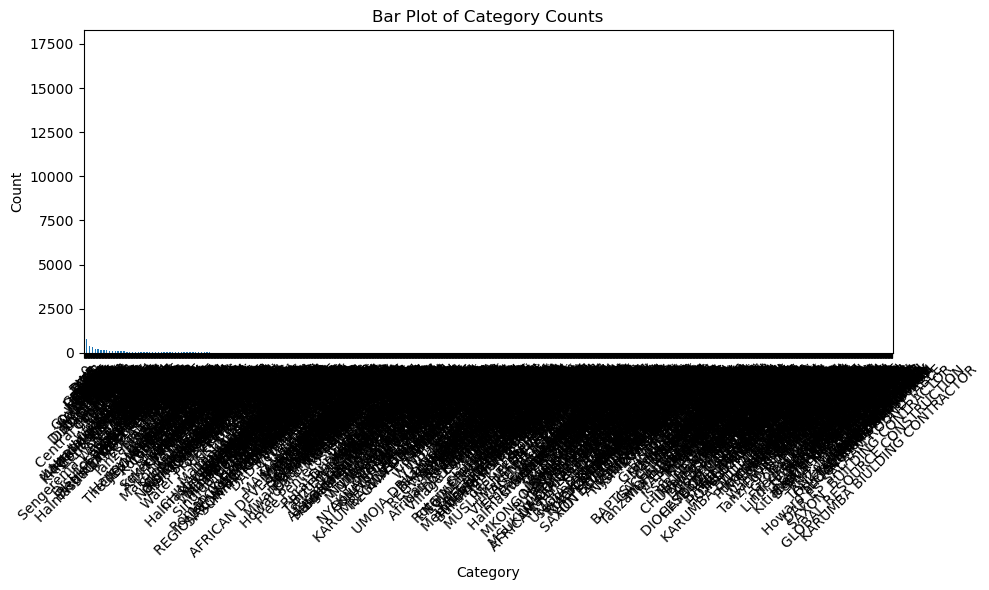

In [32]:
category_counts = df['installer'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Bar Plot of Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### longitude and latitude

We can look at the distribution of functional, functional needs repair and non-functional pumps in the country as below.

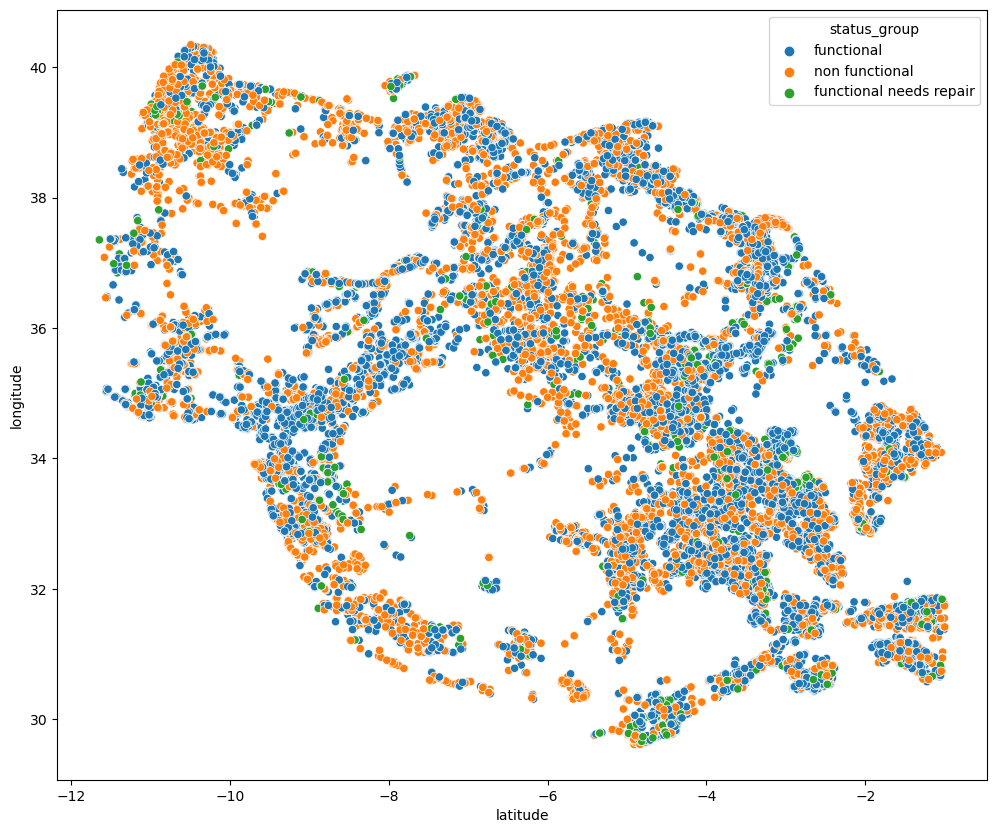

In [33]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="latitude", y="longitude", data=df[~df.longitude.isin([0])],hue="status_group")
plt.show()

### basin

In [34]:
# The unique basins where the waterpoints are distributed.
df['basin'].value_counts()

basin
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: count, dtype: int64

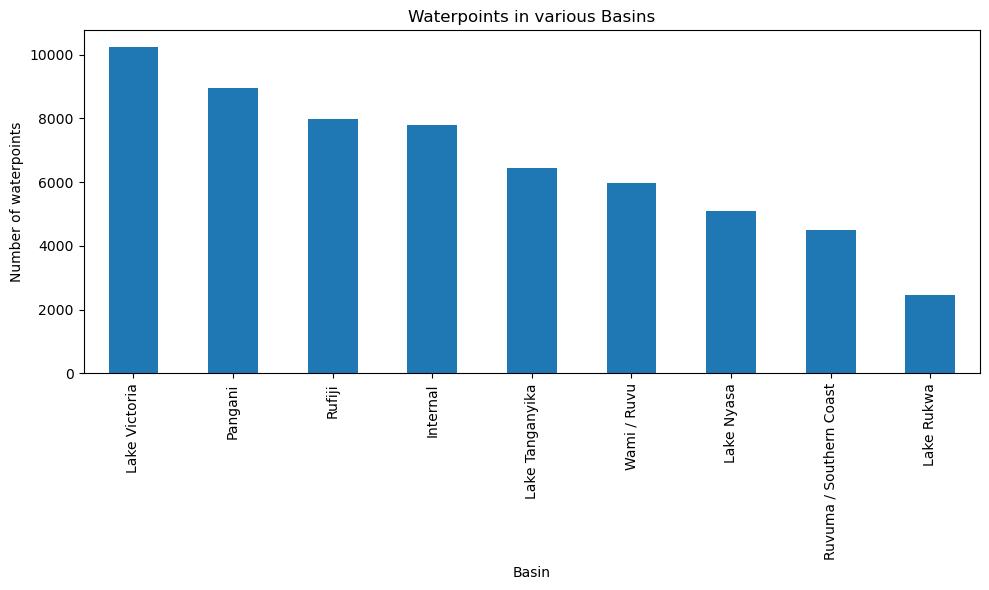

In [110]:
category_counts = df['basin'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Waterpoints in various Basins')
plt.xlabel('Basin')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

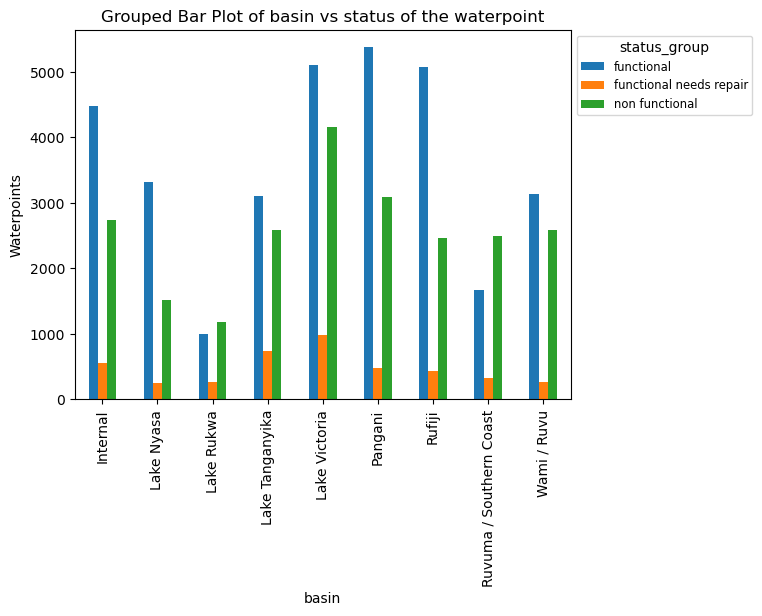

In [111]:
# using matplotlib 
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['basin', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of basin vs status of the waterpoint')
plt.xlabel('basin')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

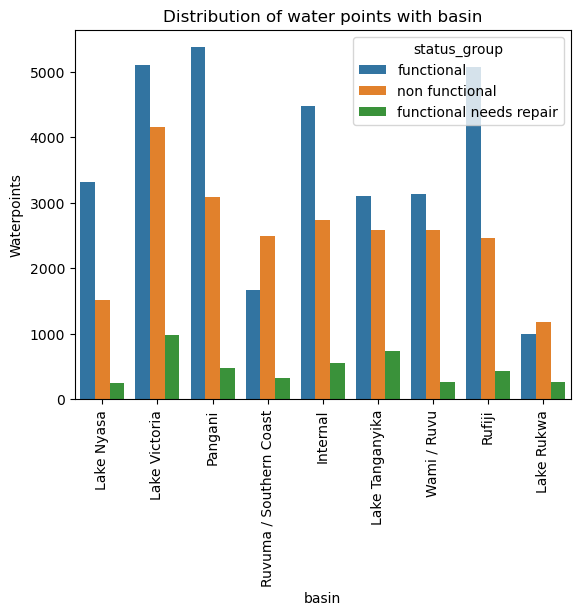

<Figure size 2000x1200 with 0 Axes>

In [112]:
# using seaborn
ax = sns.countplot(hue="status_group", x="basin", data=df[~df.scheme_management.isin([0])])
plt.title('Distribution of water points with basin')
plt.xticks(rotation=90)
ax.set_ylabel('Waterpoints')
plt.figure(figsize=(20, 12))
plt.show()

### subvillage, region and region_code

The region feature is a categorized subvillage feature and is given codes the region_code feature.

In [38]:
df['subvillage'].value_counts()

subvillage
Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: count, Length: 19287, dtype: int64

In [39]:
df['region'].value_counts()

region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64

In [40]:
df['region_code'].value_counts()

region_code
11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: count, dtype: int64

In [41]:
print(f"The number of unique values in the region feature is: {len(df['region'].value_counts())}")
print(f"While, the number of unique values in the region_code feature is: {len(df['region_code'].value_counts())}")

The number of unique values in the region feature is: 21
While, the number of unique values in the region_code feature is: 27


The region feature can be used since it categorizes the information in subvillage. region_code is the region(geographical location) but coded. We can proceed the analysis with the region feature.

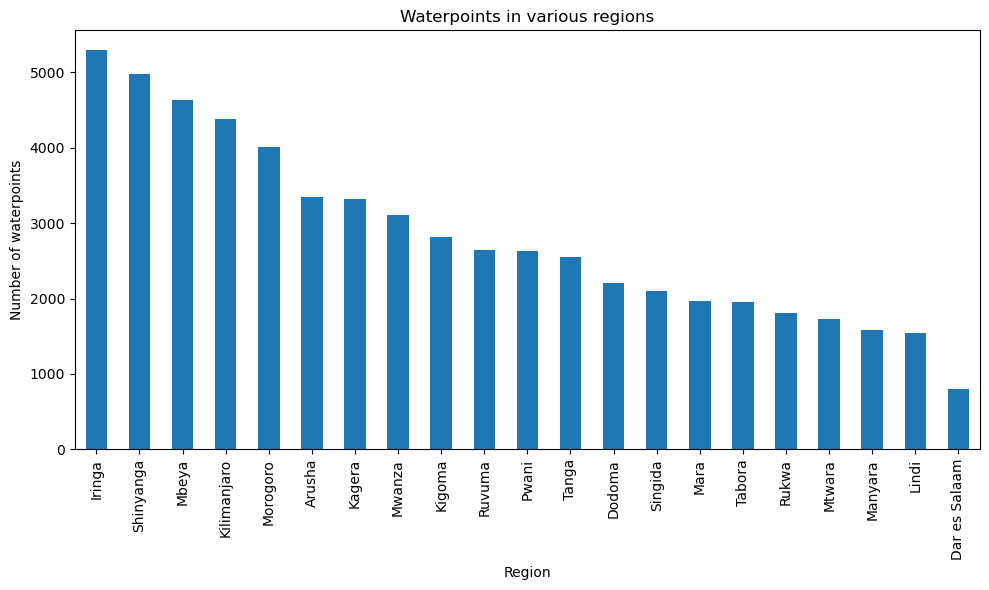

In [42]:
category_counts = df['region'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Waterpoints in various regions')
plt.xlabel('Region')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

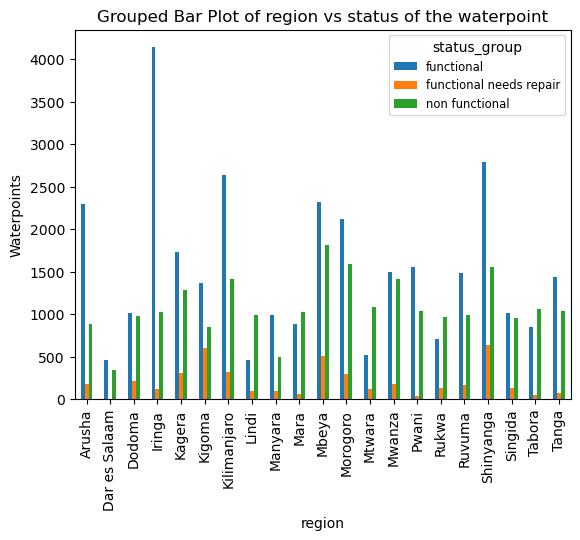

In [43]:
# using matplotlib 
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['region', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of region vs status of the waterpoint')
plt.xlabel('region')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### district_code, lga, ward

In [44]:
df['district_code'].value_counts()
print(len(df['district_code'].value_counts()))

20


In [45]:
df['lga'].value_counts()

lga
Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: count, Length: 125, dtype: int64

In [46]:
df['ward'].value_counts()

ward
Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: count, Length: 2092, dtype: int64

### population

In [47]:
df['population'].value_counts()

population
0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: count, Length: 1049, dtype: int64

In [ ]:
category_counts = df['public_meeting'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Whether public meeting occured')
plt.xlabel('True/False')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### public_meeting

In [48]:
df['public_meeting'].value_counts()

public_meeting
True     51011
False     5055
Name: count, dtype: int64

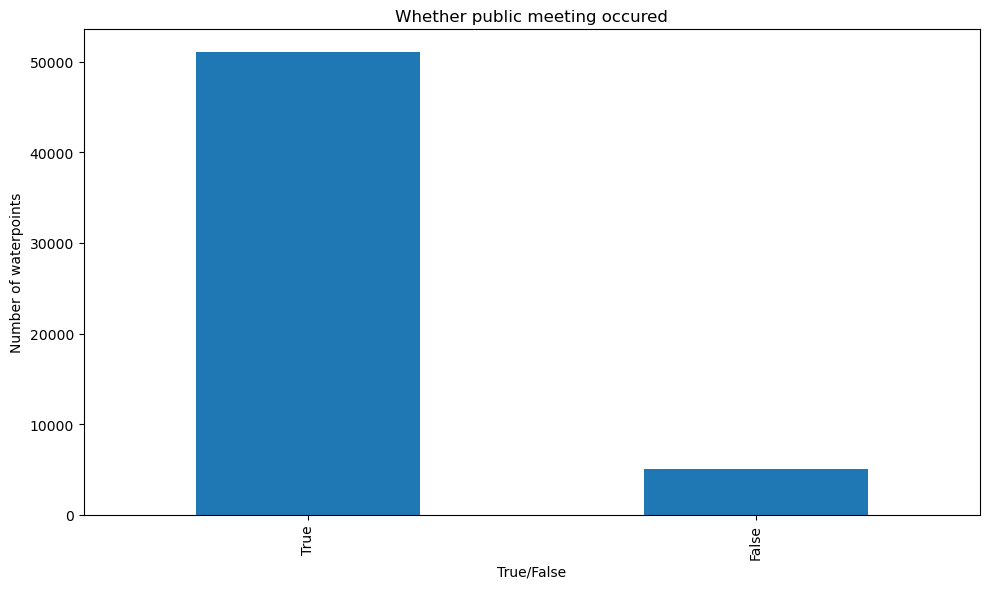

In [49]:
category_counts = df['public_meeting'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Whether public meeting occured')
plt.xlabel('True/False')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

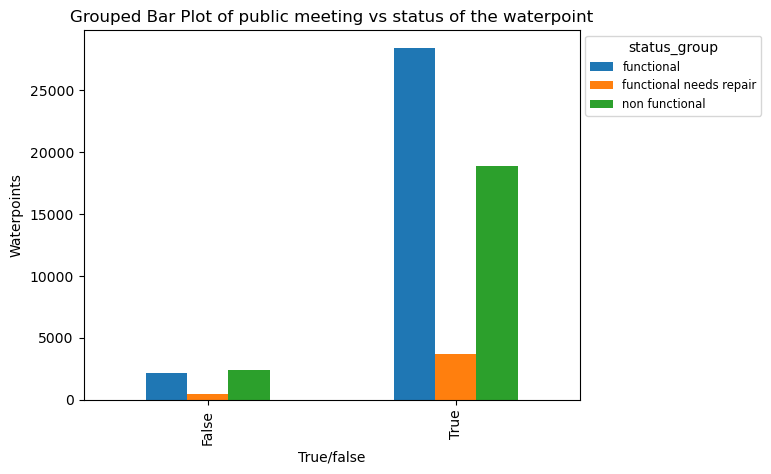

In [50]:
# using matplotlib 
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['public_meeting', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of public meeting vs status of the waterpoint')
plt.xlabel('True/false')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

Class Imbalance above, we hence

### recorded_by

In [51]:
df['recorded_by'].value_counts()

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

### scheme_management

In [52]:
df['scheme_management'].value_counts()

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

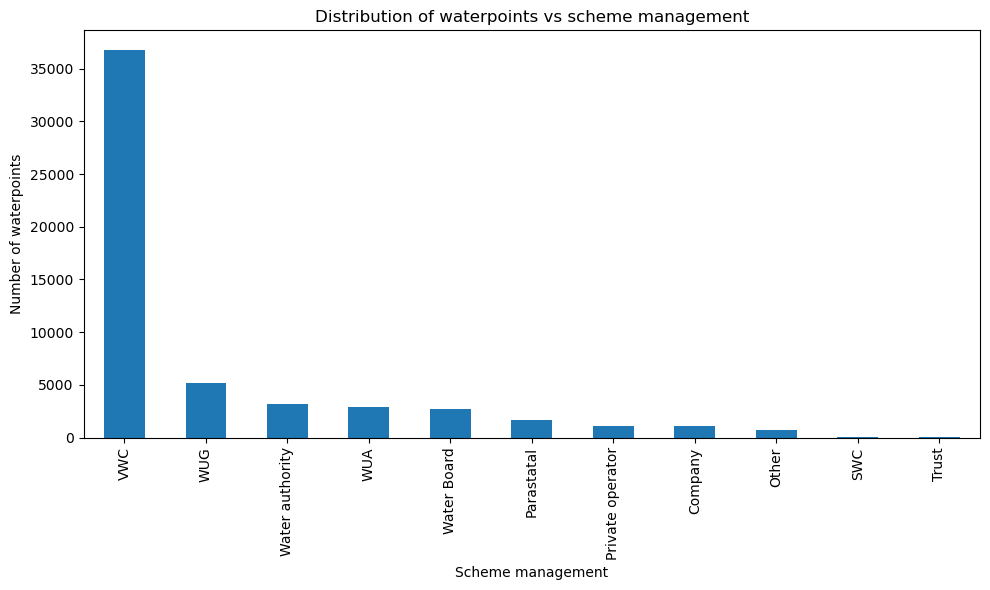

In [53]:
category_counts = df['scheme_management'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs scheme management')
plt.xlabel('Scheme management')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

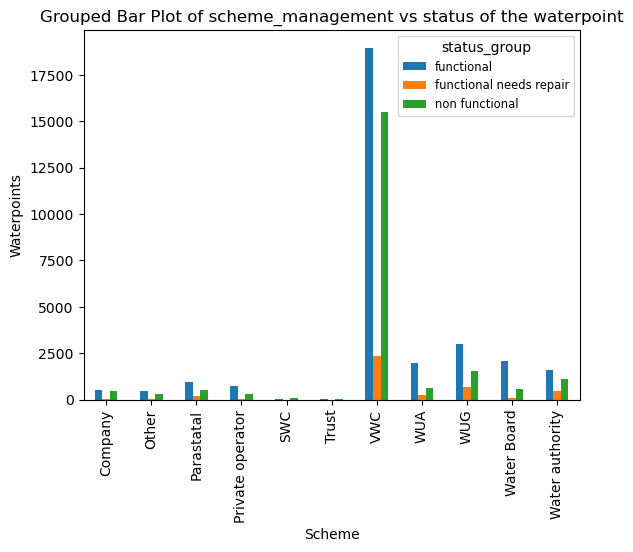

In [54]:
# using matplotlib 
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['scheme_management', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of scheme_management vs status of the waterpoint')
plt.xlabel('Scheme')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### permit

In [55]:
df['permit'].value_counts()

permit
True     38852
False    17492
Name: count, dtype: int64

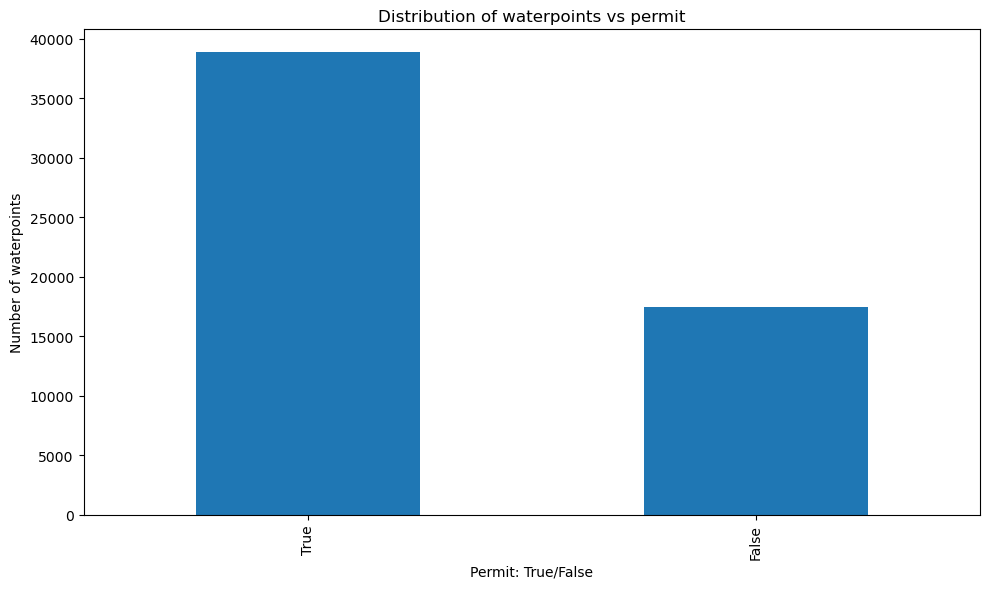

In [56]:
category_counts = df['permit'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs permit')
plt.xlabel('Permit: True/False')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

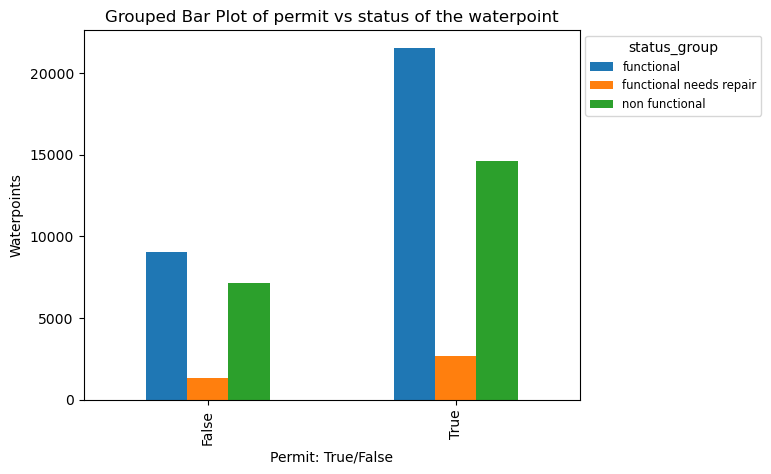

In [57]:
# using matplotlib 
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['permit', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of permit vs status of the waterpoint')
plt.xlabel('Permit: True/False')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### construction_year

In [58]:
df['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

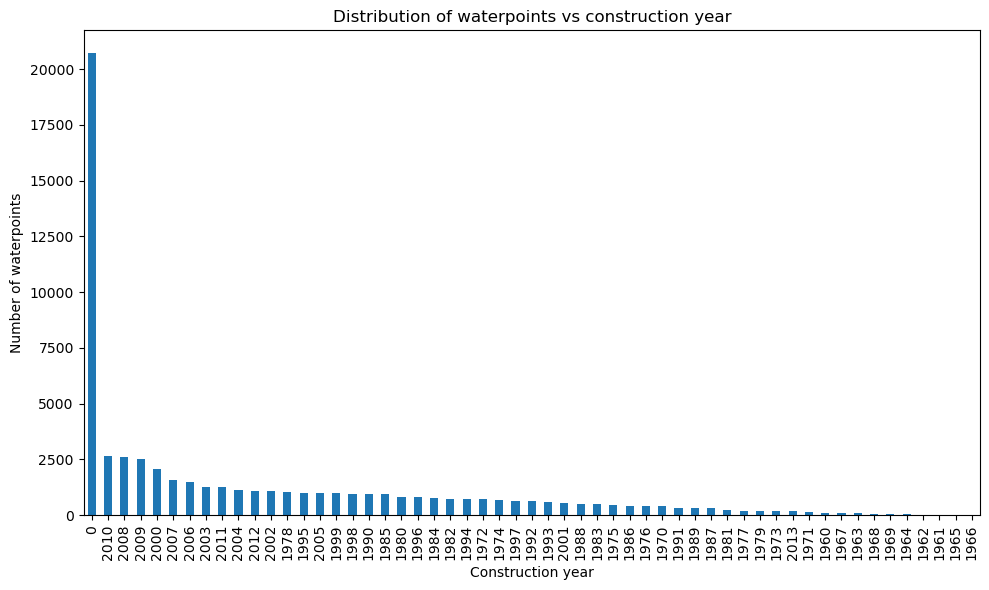

In [59]:
category_counts = df['construction_year'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs construction year')
plt.xlabel('Construction year')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

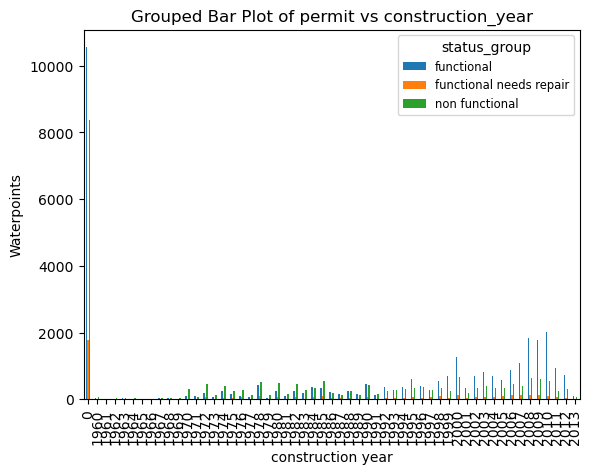

In [60]:
# Bi variate
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['construction_year', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of permit vs construction_year')
plt.xlabel('construction year')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### extraction_type, extraction_type_group, extraction_type_class

In [61]:
df['extraction_type'].value_counts()

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64

In [62]:
df['extraction_type_group'].value_counts()

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

In [63]:
df['extraction_type_class'].value_counts()

extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

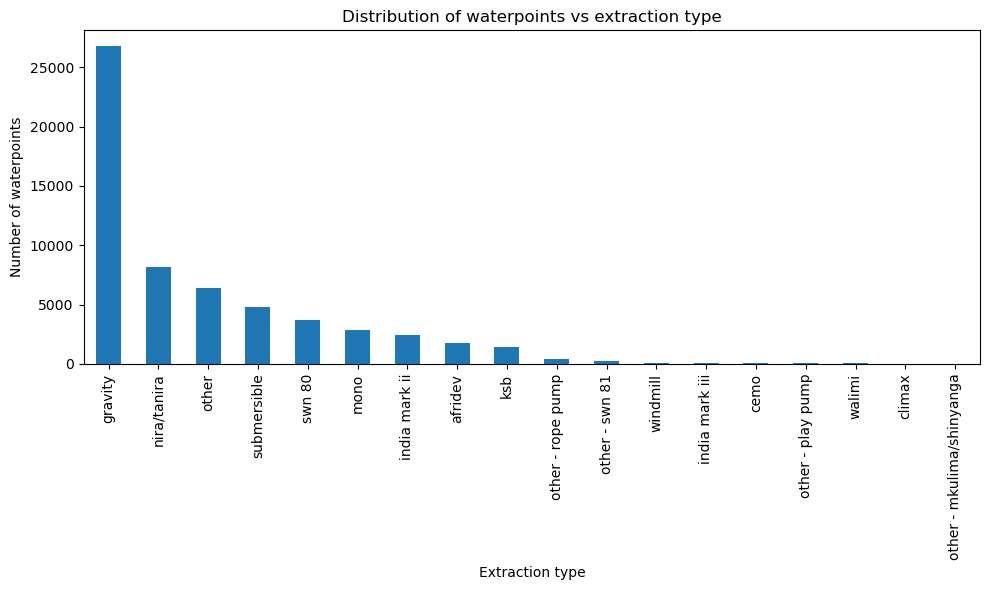

In [64]:
category_counts = df['extraction_type'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs extraction type')
plt.xlabel('Extraction type')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

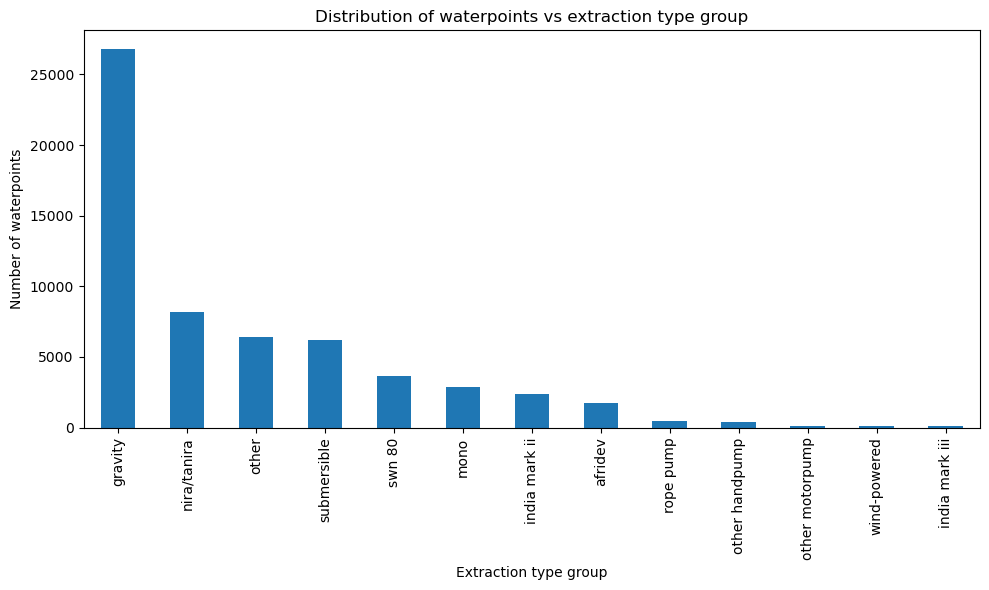

In [65]:
category_counts = df['extraction_type_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs extraction type group')
plt.xlabel('Extraction type group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

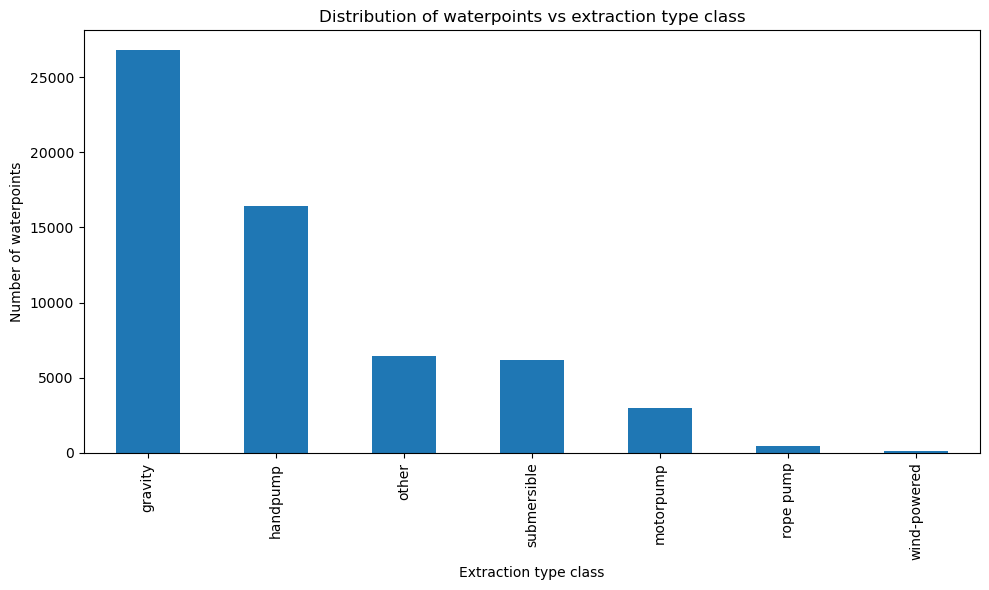

In [66]:
category_counts = df['extraction_type_class'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs extraction type class')
plt.xlabel('Extraction type class')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [67]:
## why we retain extraction type

<Figure size 3000x1500 with 0 Axes>

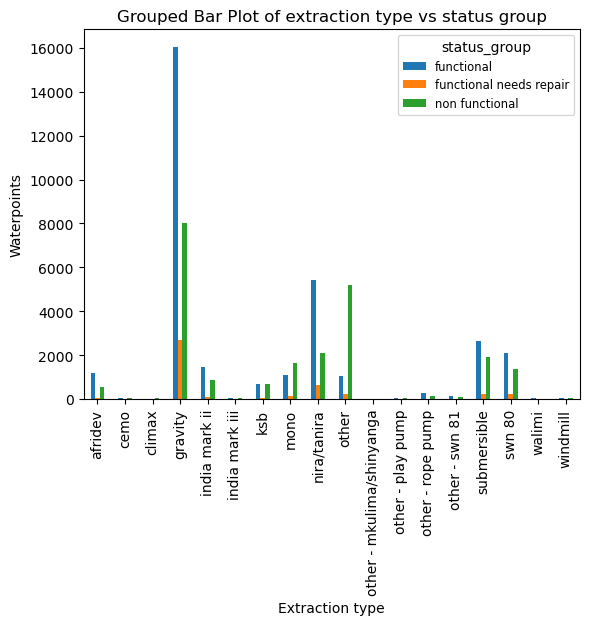

In [68]:
# Bi variate
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['extraction_type', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of extraction type vs status group')
plt.xlabel('Extraction type')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### management, management_group

In [69]:
df['management'].value_counts()

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64

In [70]:
df['management_group'].value_counts()

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

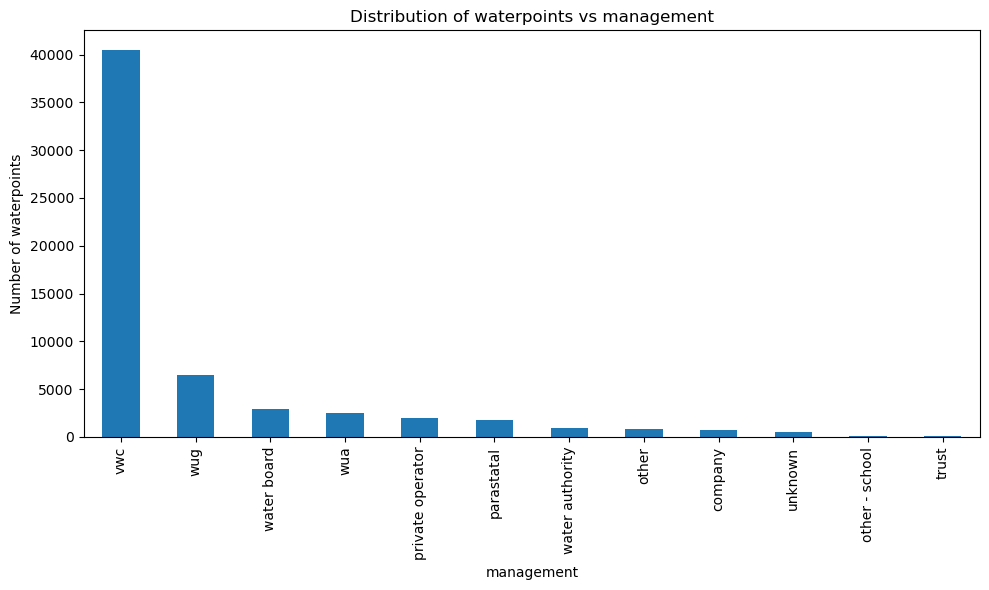

In [71]:
category_counts = df['management'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs management')
plt.xlabel('management')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

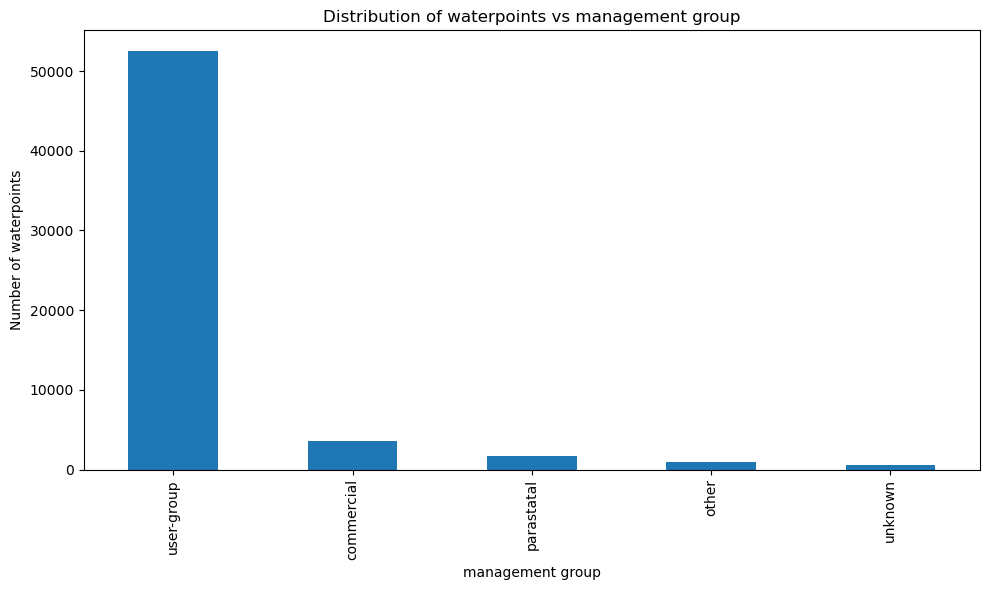

In [72]:
category_counts = df['management_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs management group')
plt.xlabel('management group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

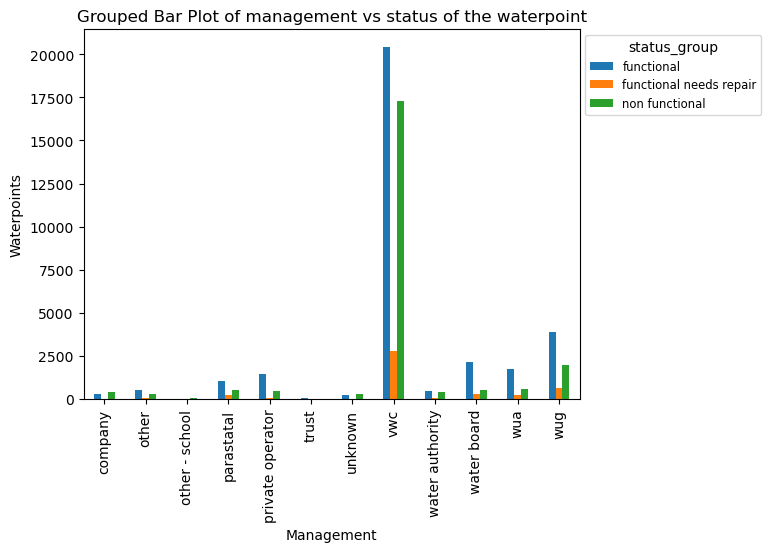

In [73]:
# Bi variate
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['management', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of management vs status of the waterpoint')
plt.xlabel('Management')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### payment, payment_type

In [74]:
df['payment'].value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

In [75]:
df['payment_type'].value_counts()

payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64

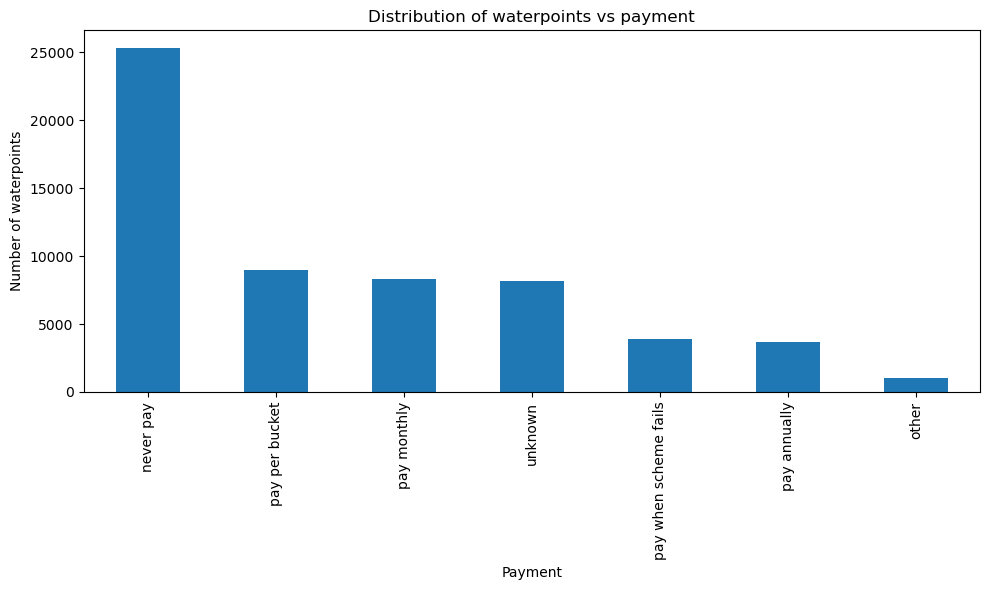

In [76]:
category_counts = df['payment'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs payment')
plt.xlabel('Payment')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

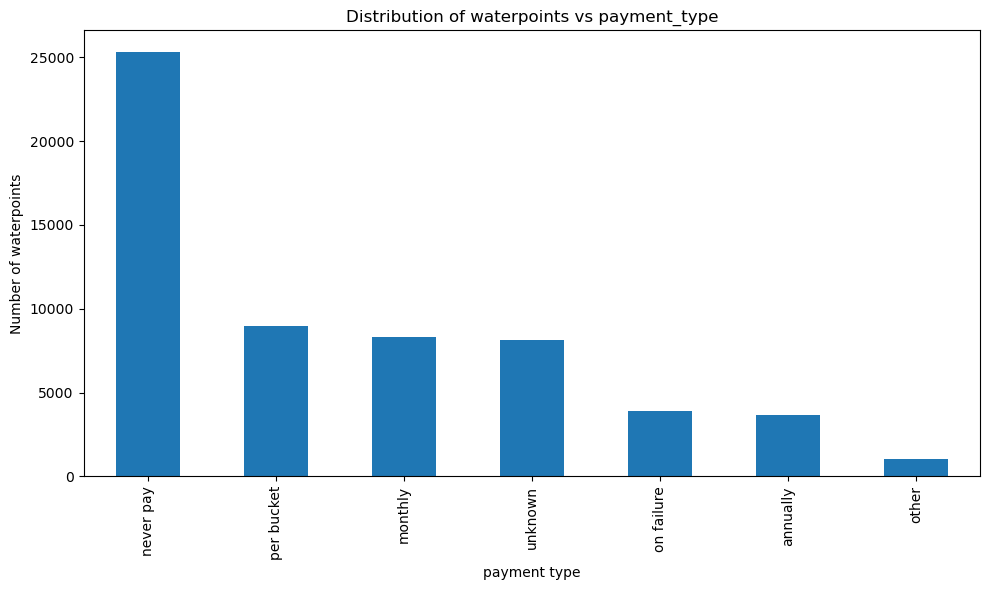

In [77]:
category_counts = df['payment_type'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs payment_type')
plt.xlabel('payment type')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [78]:
### why payment was chosen

<Figure size 3000x1500 with 0 Axes>

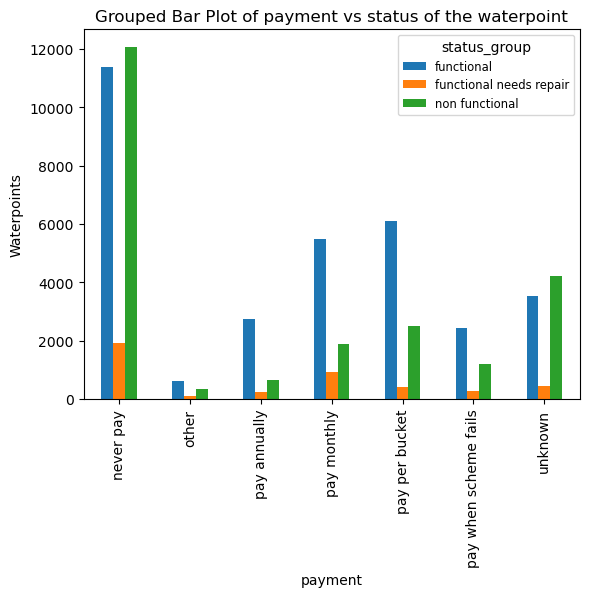

In [79]:
# Bi variate
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['payment', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of payment vs status of the waterpoint')
plt.xlabel('payment')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### water_quality, quality_group

In [80]:
df['water_quality'].value_counts()

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

In [81]:
df['quality_group'].value_counts()

quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64

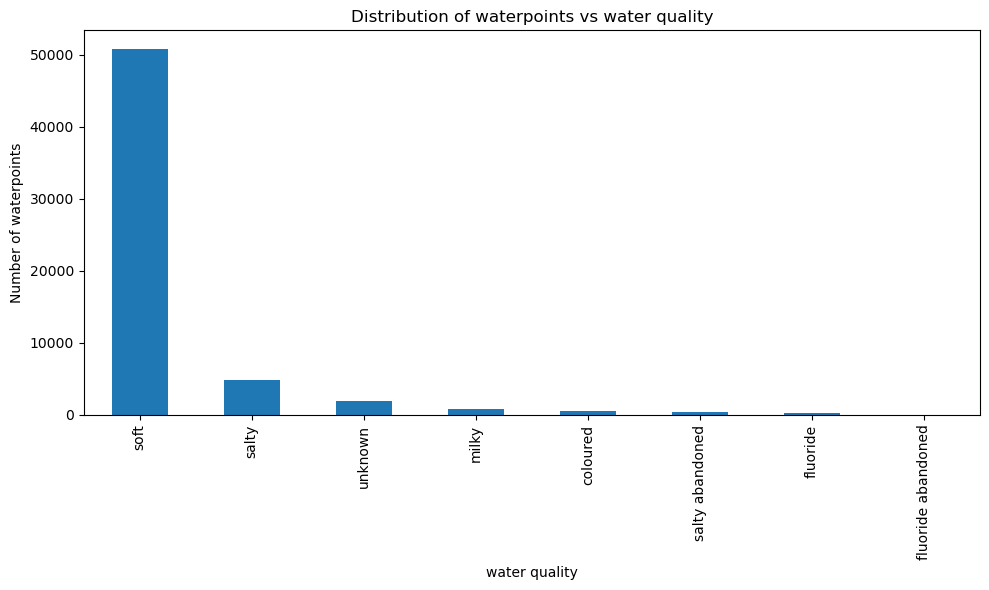

In [82]:
category_counts = df['water_quality'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs water quality')
plt.xlabel('water quality')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

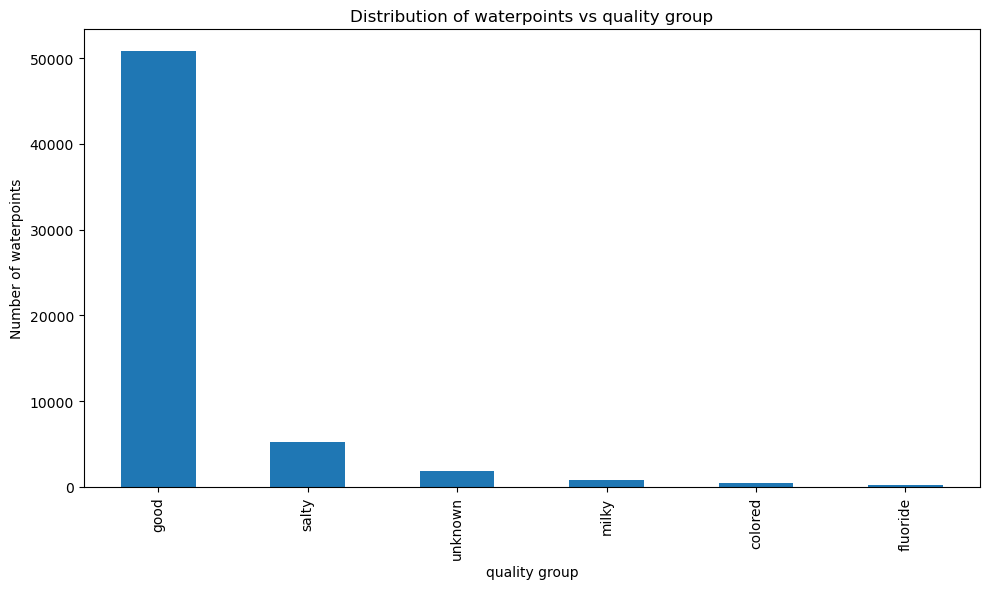

In [83]:
category_counts = df['quality_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs quality group')
plt.xlabel('quality group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

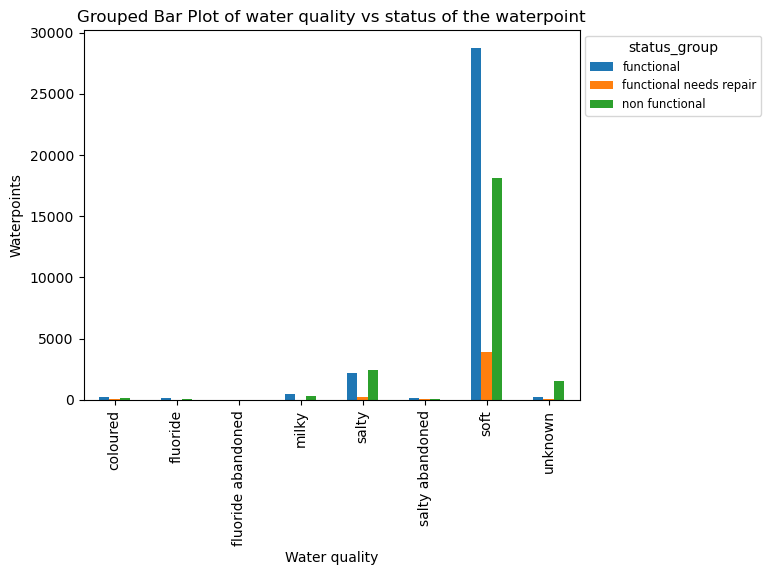

In [84]:
# Bi variate
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['water_quality', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of water quality vs status of the waterpoint')
plt.xlabel('Water quality')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### quantity, quantity_group

In [85]:
df['quantity'].value_counts()

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [86]:
df['quantity_group'].value_counts()

quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

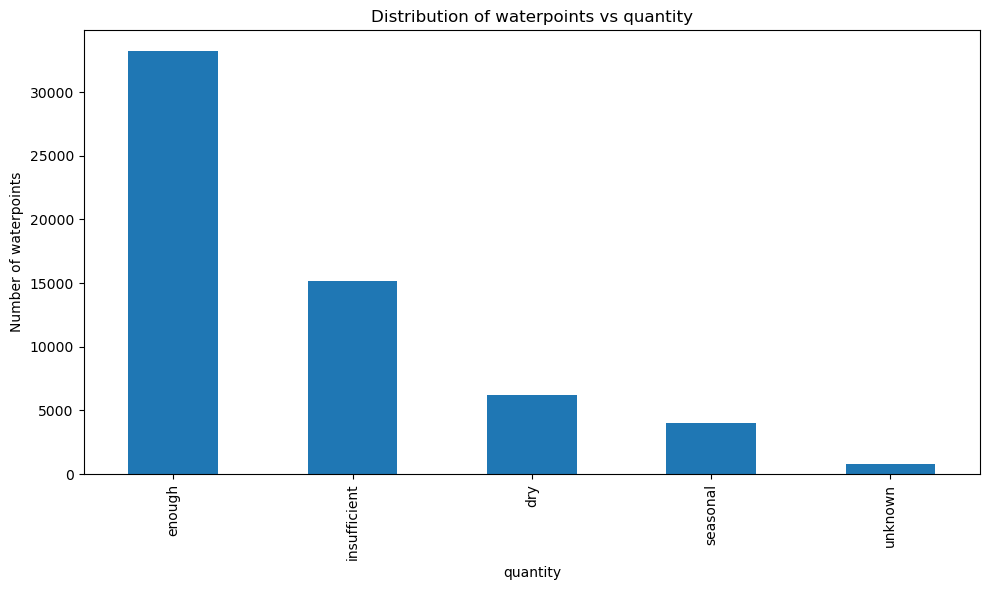

In [87]:
category_counts = df['quantity'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs quantity')
plt.xlabel('quantity')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

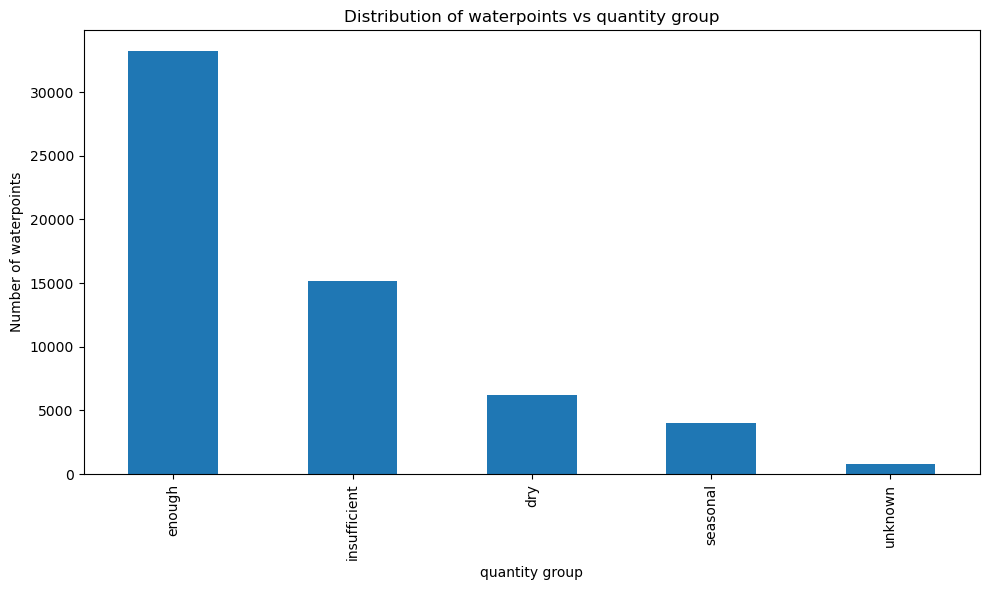

In [88]:
category_counts = df['quantity_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs quantity group')
plt.xlabel('quantity group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

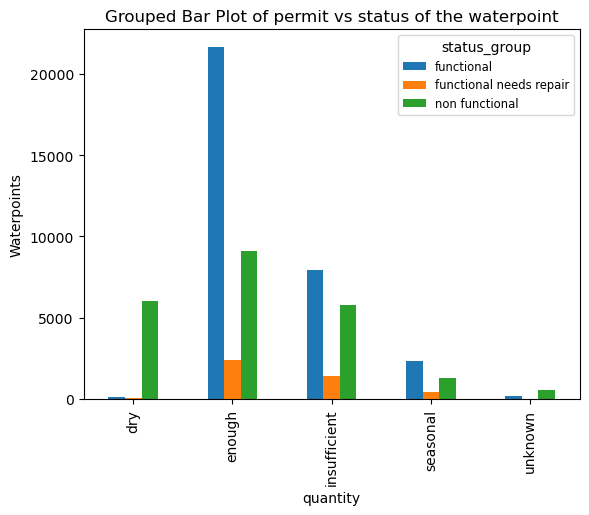

In [89]:
# Bi variate
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['quantity', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of permit vs status of the waterpoint')
plt.xlabel('quantity')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### source, source_type, source_class

In [90]:
df['source'].value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [91]:
df['source_type'].value_counts()

source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64

In [92]:
df['source_class'].value_counts()

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

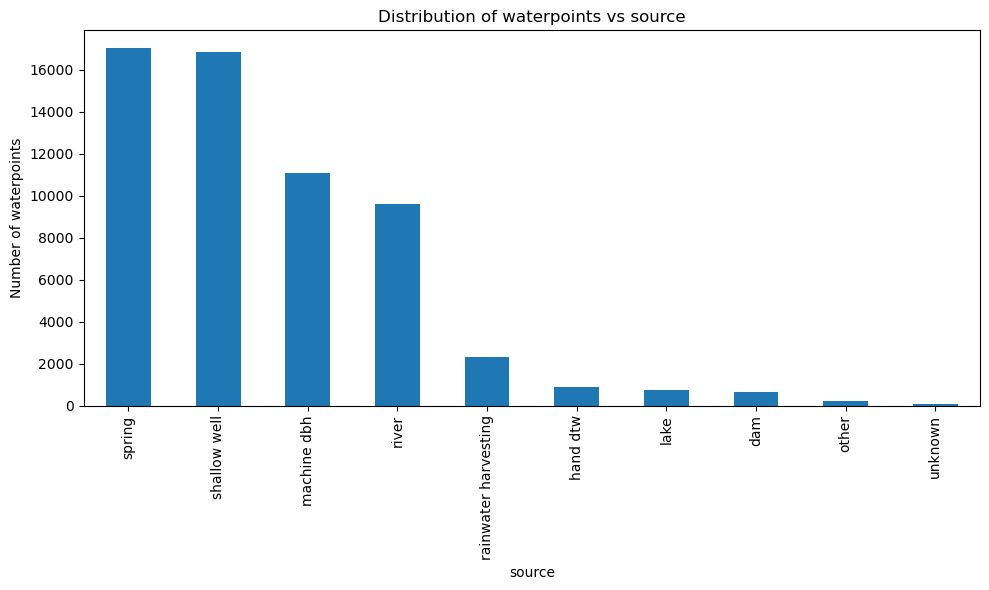

In [93]:
category_counts = df['source'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs source')
plt.xlabel('source')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

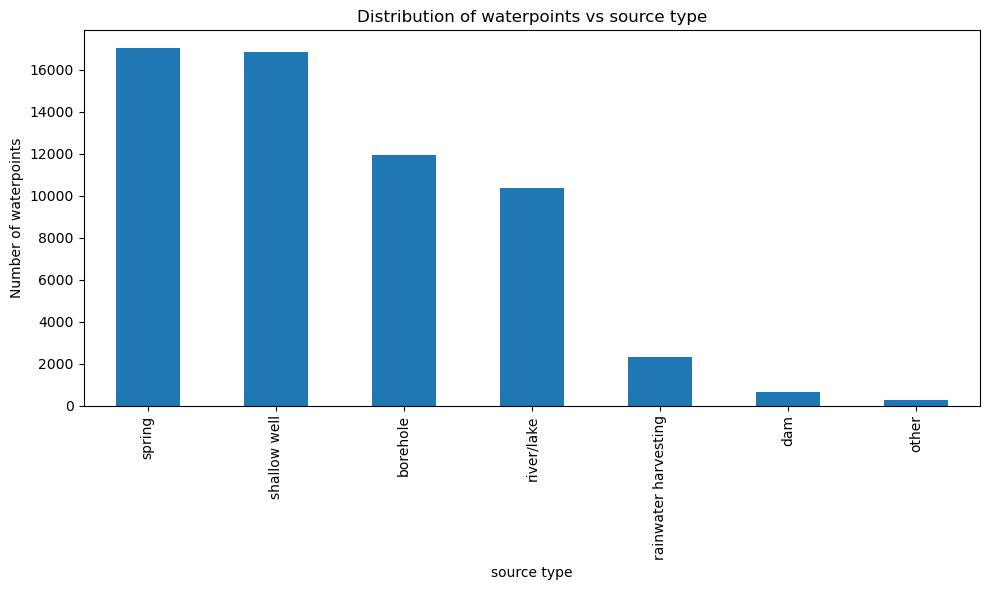

In [94]:
category_counts = df['source_type'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs source type')
plt.xlabel('source type')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

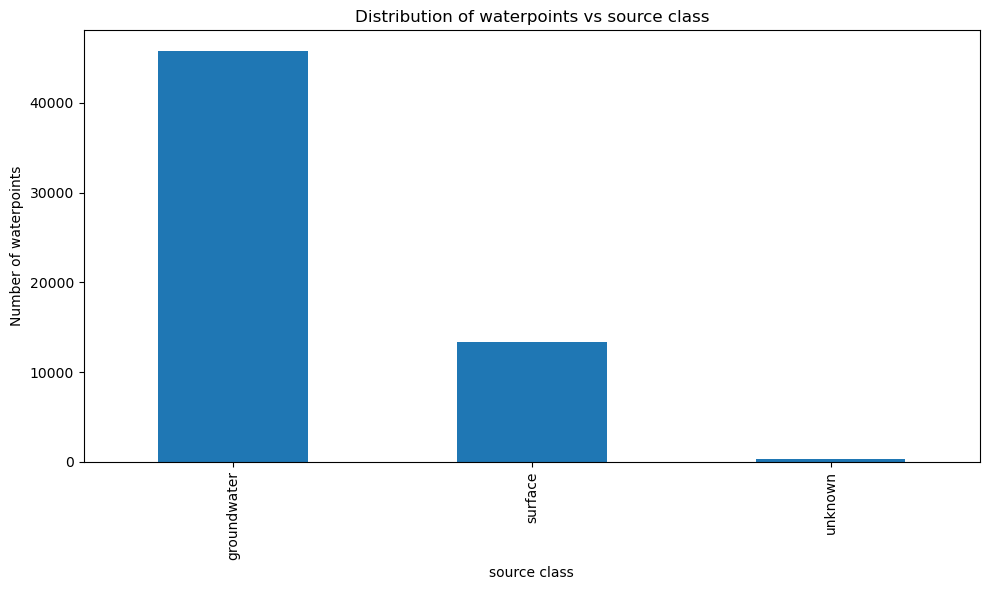

In [95]:
category_counts = df['source_class'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs source class')
plt.xlabel('source class')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

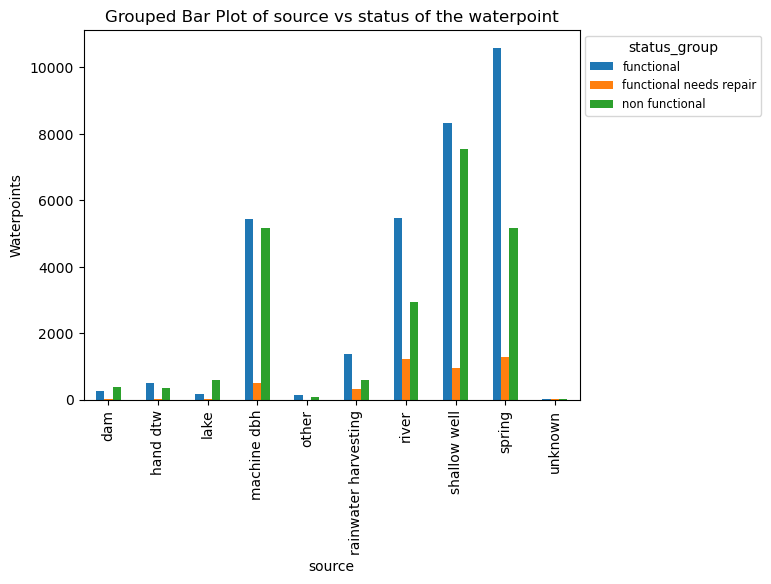

In [96]:
# Bi variate
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['source', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of source vs status of the waterpoint')
plt.xlabel('source')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### waterpoint_type, waterpoint_type_group

In [97]:
df['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [98]:
df['waterpoint_type_group'].value_counts()

waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64

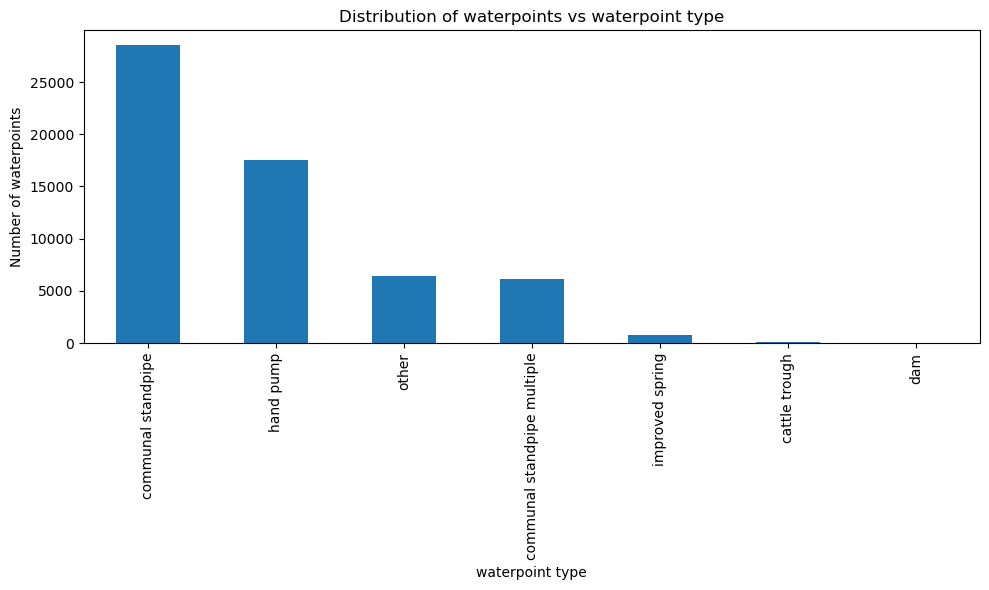

In [99]:
category_counts = df['waterpoint_type'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs waterpoint type')
plt.xlabel('waterpoint type')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

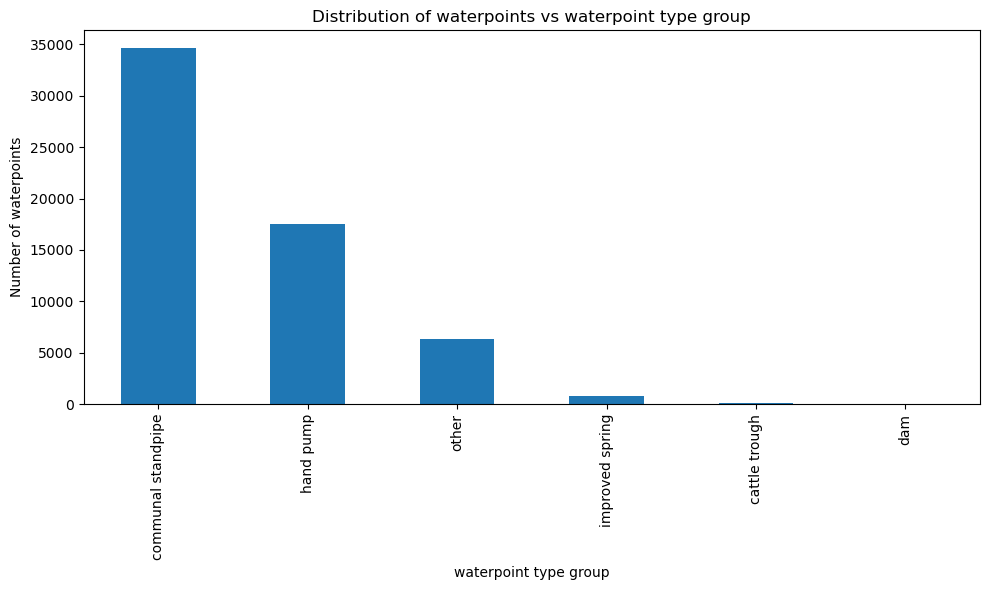

In [100]:
category_counts = df['waterpoint_type_group'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
category_counts.plot(kind='bar')
plt.title('Distribution of waterpoints vs waterpoint type group')
plt.xlabel('waterpoint type group')
plt.ylabel('Number of waterpoints')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 3000x1500 with 0 Axes>

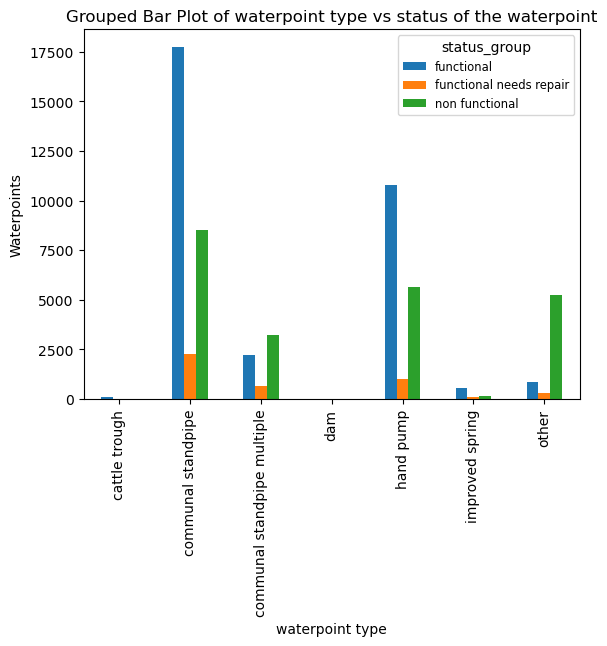

In [101]:
# Bi variate
plt.figure(figsize=(30, 15))
grouped_counts = df.groupby(['waterpoint_type', 'status_group']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False)
plt.title('Grouped Bar Plot of waterpoint type vs status of the waterpoint')
plt.xlabel('waterpoint type')
plt.ylabel('Waterpoints')
plt.xticks(range(len(grouped_counts.index)), grouped_counts.index, rotation=90)
plt.legend(title='status_group', fontsize="small", bbox_to_anchor=(1,1))
plt.show()

### status_group

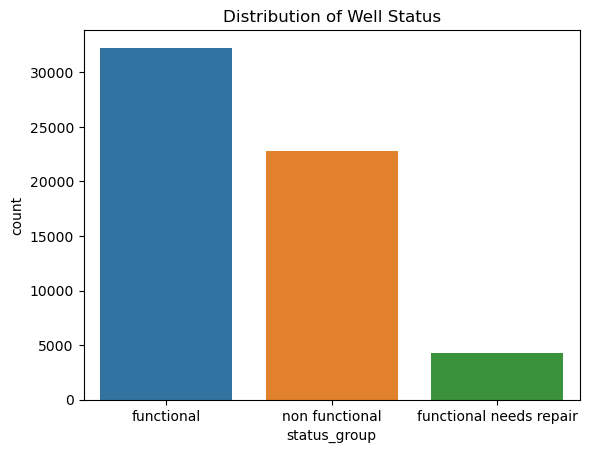

In [102]:
# Univariate Analysis
# Distribution of well status
sns.countplot(x='status_group', data=df)
plt.title('Distribution of Well Status')
plt.show()

There are more functional pumps in the dataset as opposed to non functional. This feature is composed of categorical data.

## Dropping columns

In [107]:
### dropping columns
# longitude and latitude inquiry
df.drop(columns=['amount_tsh','subvillage','region_code','recorded_by','extraction_type_group','extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group'], inplace=True)

In [108]:
df.columns.tolist()

['funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'basin',
 'region',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'scheme_management',
 'permit',
 'construction_year',
 'extraction_type',
 'management',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'status_group']

In [109]:
df.head()

,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,...,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,...,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,...,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,...,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,...,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [ ]:
# Multivariate Analysis - Correlation Heatmap.
plt.figure(figsize=(12, 8))
correlation_matrix = merged_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()